# GEMS3 tutorial: Efficiently using the *table_classif_explainer* object
    


In [1]:
import numpy as np                     #gems2 mainly works with numpy array
import sklearn as sk                   #gems2 also use some sklearn function for optimality   
import matplotlib.pyplot as plt        #basic librairy for plotting
import pandas as pd                    #usefull for preprocessing data, before using gems2
from tqdm import tqdm                  #to know the progress of a loop
from sklearn import preprocessing


## 1: Load and pre-process Adult Census data

Let's first give ourself a dataset which we will use on this tutorial, the preprocessing comes mainly from there :
https://github.com/XAI-ANITI/StoryOfBias/blob/master/StoryOfBias.ipynb

You can download the dataset itself here : https://www.kaggle.com/datasets/wenruliu/adult-income-datase

This dataset has personal information such as age, number of years spent studying, and martial status associated with the yearly income; more precisely, we will look at if those persons have a yearly income higher than $50,000.

### 1.1 Data loading

In [2]:

from LEFkit.data import LoadAndTreatAdultCensus

data_ohe = LoadAndTreatAdultCensus.get_treated_dataframe(verbose=False)

X_raw_col_names=data_ohe.columns



In [3]:
n=len(data_ohe)
X_train = data_ohe.drop('Target', axis = 1).iloc[:int(n*0.8)]
Y_train = data_ohe['Target'][:int(n*0.8)]
X_test  = data_ohe.drop('Target', axis = 1).iloc[int(n*0.8):]
Y_test  = data_ohe['Target'][int(n*0.8):]


In [4]:
X_test.head()



,Age,Education-Num,OrigEthn,Gender,Capital Gain,Capital Loss,Hours per week,Child,Workclass_Federal-gov,Workclass_Local-gov,...,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving
39073,30.0,13.0,1.0,1.0,0.0,0.0,55.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False
39074,39.0,9.0,0.0,1.0,0.0,1887.0,40.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,True
39075,19.0,10.0,1.0,0.0,0.0,0.0,20.0,1.0,False,False,...,False,False,False,False,False,False,False,True,False,False
39076,25.0,9.0,1.0,1.0,0.0,0.0,40.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False
39077,57.0,9.0,1.0,1.0,0.0,0.0,60.0,0.0,False,False,...,False,False,False,True,False,False,False,False,False,False


In [5]:
X_train_scaled = np.asarray(sk.preprocessing.StandardScaler().fit(X_train).transform(X_train))
X_test_scaled  = np.asarray(sk.preprocessing.StandardScaler().fit(X_test).transform(X_test))

## 2: Train different classifiers <a name="a-pred"></a>

### 2.1 Logistic regression <a name="a-logi"></a>

In [6]:
from sklearn.linear_model import LogisticRegression

clf_LR = LogisticRegression(solver='lbfgs',max_iter=50)
clf_LR.fit(X_train_scaled,Y_train)
pred_logi=1.*clf_LR.predict_proba(X_test_scaled)[:,1]

### 2.2 Decision Tree <a name="a-DT"></a>

In [7]:
from sklearn.tree import DecisionTreeClassifier

clf_DT=DecisionTreeClassifier(max_depth=5)
clf_DT.fit(X_train_scaled,Y_train)
pred_DT = clf_DT.predict_proba(X_test_scaled)[:,1]

### 2.3 Gradient boosting <a name="a-DT"></a>

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

clf_GB=GradientBoostingClassifier()
clf_GB.fit(X_train_scaled,Y_train)
pred_GB = clf_DT.predict_proba(X_test_scaled)[:,1]



### 2.4 Prediction accuracy <a name="a-acc"></a>

In [9]:
Y_pred_logi=1*(pred_logi>0.5)
Y_pred_DT=1*(pred_DT>0.5)
Y_pred_GB=1*(pred_GB>0.5)

print('Logistic regression accuracy is ', 1-np.mean(np.abs(Y_pred_logi-Y_test)))
print('Decision tree accuracy is ', 1-np.mean(np.abs(Y_pred_DT-Y_test)))
print('Gradient Boosting accuracy is ', 1-np.mean(np.abs(Y_pred_GB-Y_test)))

Logistic regression accuracy is  0.8534138601699253
Decision tree accuracy is  0.8481932644078207
Gradient Boosting accuracy is  0.8481932644078207


## 3: Study a classifier using *table_classif_explainer*

In [10]:
X_col_names=X_test.columns


X=np.asarray(X_test)
y=np.asarray(Y_test)
y_pred=Y_pred_GB


print('X.shape',X.shape)
print('y.shape',y.shape)
print('y_pred.shape',y_pred.shape)
print('len(X_col_names)',len(X_col_names))


X.shape (9769, 37)
y.shape (9769,)
y_pred.shape (9769,)
len(X_col_names) 37


In [11]:


import LEFkit

from LEFkit.robustness.GEMS3_base_explainer import *

from LEFkit.robustness.GEMS3_classification_explainer import table_classif_explainer



### 3.1 Mean influences

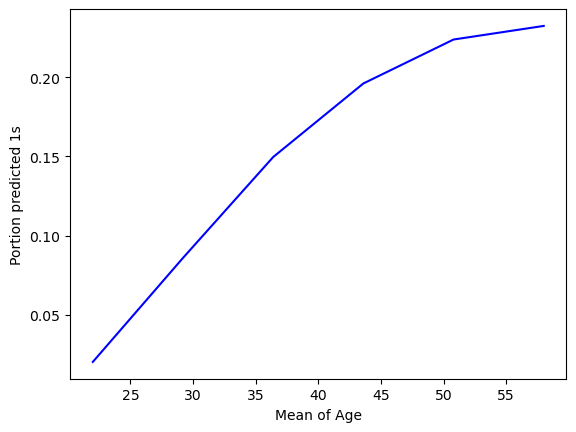

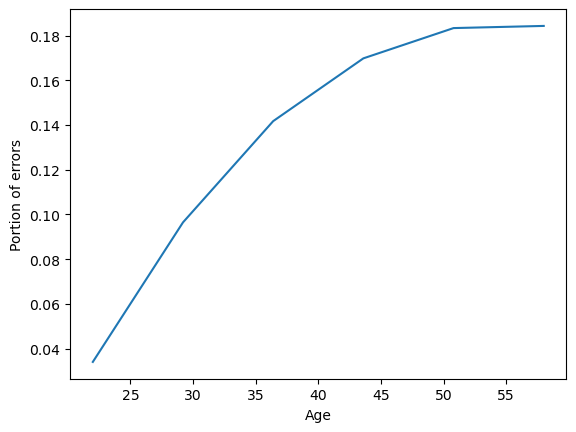

In [12]:
tce=table_classif_explainer(X, y_pred,y_true=y)

col_of_interest=0  # -> age
tce.plot_mean_influence_on_pred(col_of_interest,X_column_name=X_col_names[col_of_interest])
tce.plot_mean_influence_on_errors(col_of_interest,X_column_name=X_col_names[col_of_interest])


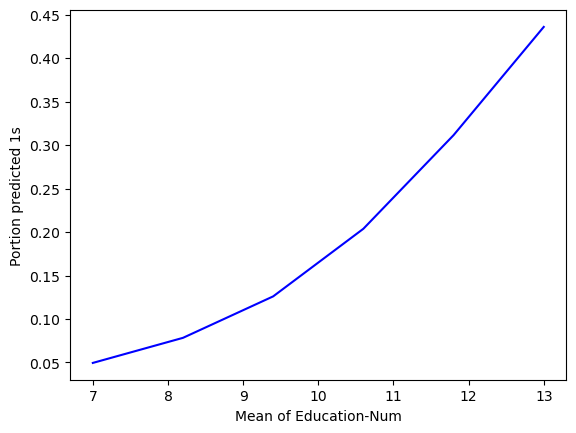

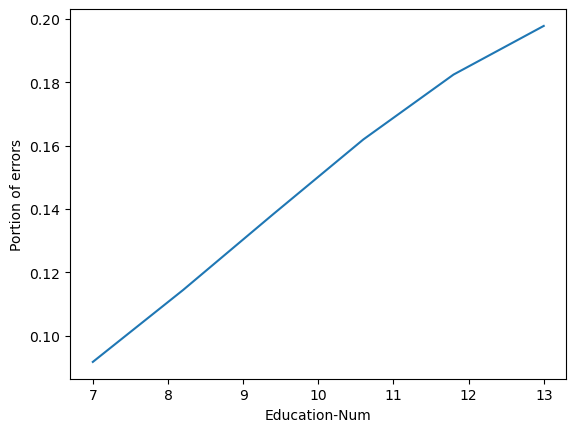

In [13]:
col_of_interest=1  # -> Education-Num
tce.plot_mean_influence_on_pred(col_of_interest,X_column_name=X_col_names[col_of_interest])
tce.plot_mean_influence_on_errors(col_of_interest,X_column_name=X_col_names[col_of_interest])


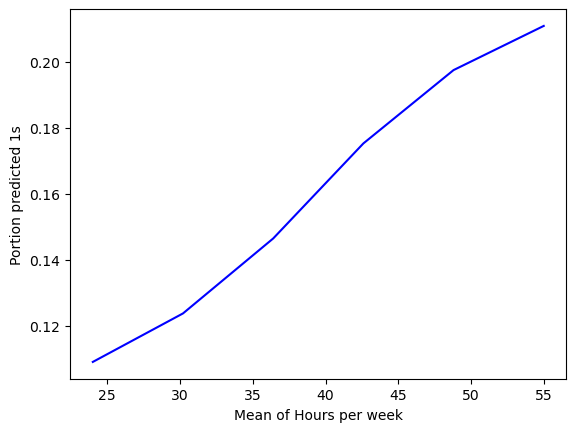

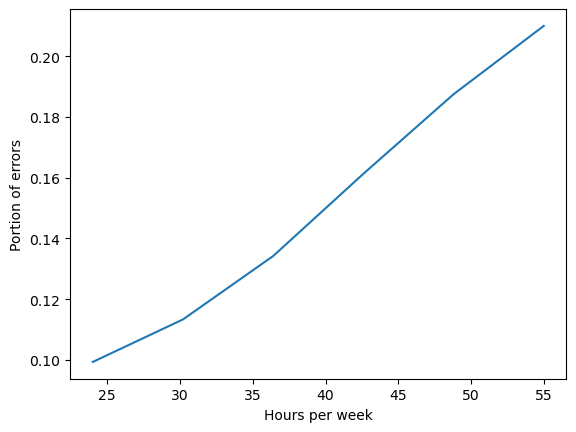

In [14]:

col_of_interest=6  # -> Hours per week
tce.plot_mean_influence_on_pred(col_of_interest,X_column_name=X_col_names[col_of_interest])
tce.plot_mean_influence_on_errors(col_of_interest,X_column_name=X_col_names[col_of_interest])


### 3.2 Std influences

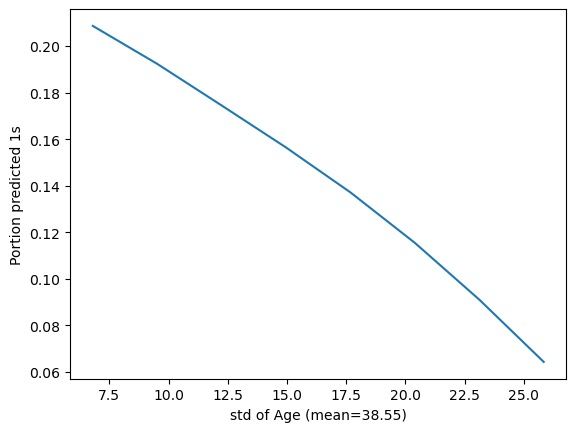

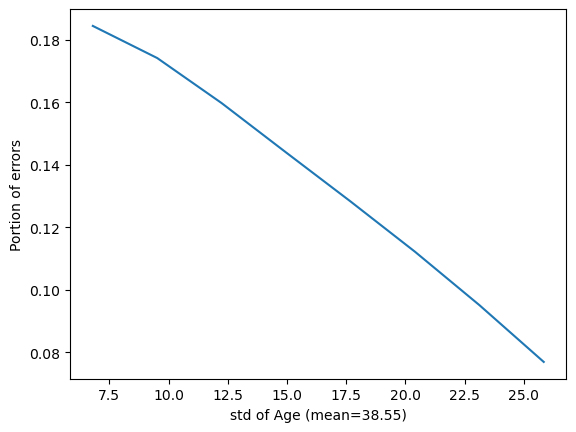

In [15]:

tce=table_classif_explainer(X, y_pred,y_true=y)

col_of_interest=0  # -> age
tce.plot_std_influence_on_pred(col_of_interest,X_column_name=X_col_names[col_of_interest])
tce.plot_std_influence_on_errors(col_of_interest,X_column_name=X_col_names[col_of_interest])


### 3.3 cov influences

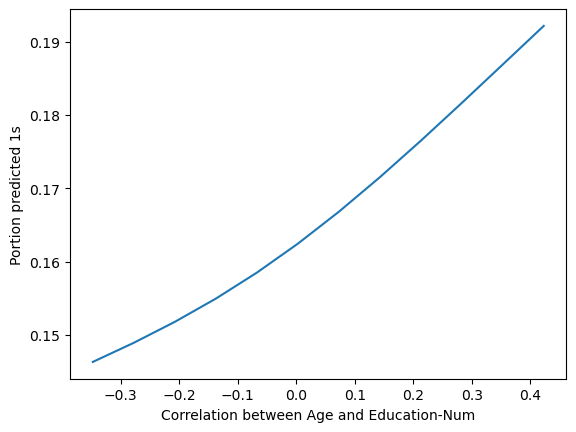

In [16]:
tce=table_classif_explainer(X, y_pred,y_true=y)

col_of_interest1=0  # -> age
col_of_interest2=1  # -> Education-Num
tce.plot_correlation_influence_on_pred(col_of_interest1,col_of_interest2,X_column_name_1=X_col_names[col_of_interest1],X_column_name_2=X_col_names[col_of_interest2])



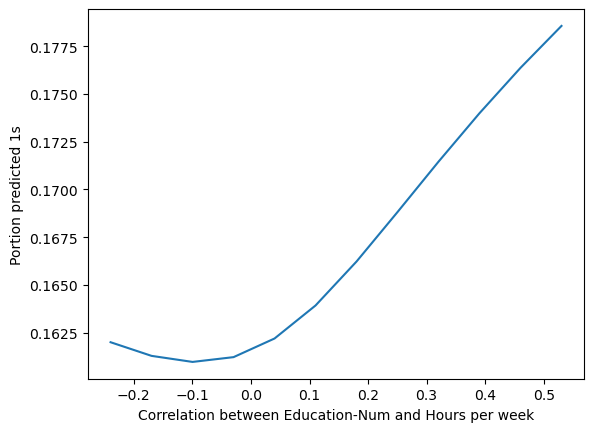

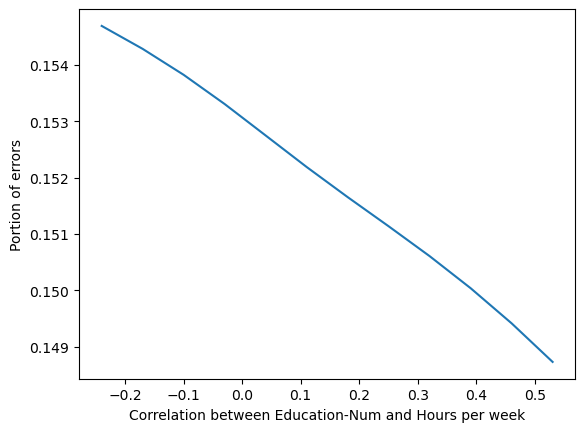

In [17]:
tce=table_classif_explainer(X, y_pred,y_true=y)

col_of_interest1=1  # -> Education-Num
col_of_interest2=6  # -> Hours per week
tce.plot_correlation_influence_on_pred(col_of_interest1,col_of_interest2,X_column_name_1=X_col_names[col_of_interest1],X_column_name_2=X_col_names[col_of_interest2])
tce.plot_correlation_influence_on_errors(col_of_interest1,col_of_interest2,X_column_name_1=X_col_names[col_of_interest1],X_column_name_2=X_col_names[col_of_interest2])


### 3.3.bis cov influence  for fairness

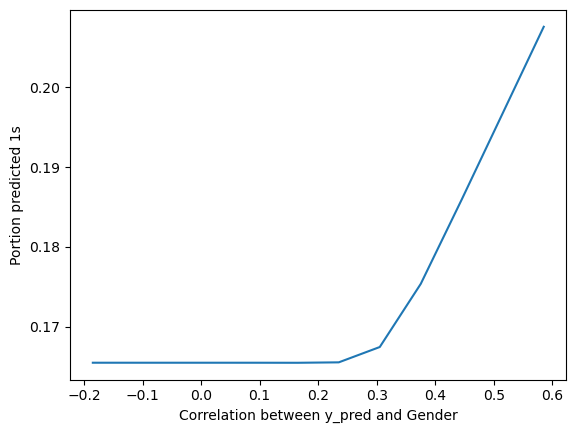

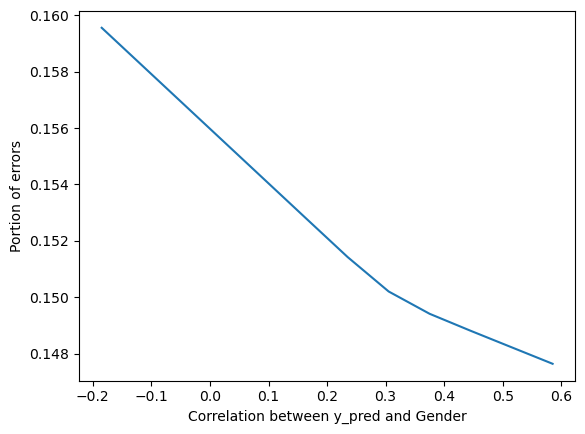

In [18]:
XandYpred=np.concatenate((X,y_pred.reshape(-1,1)),axis=1)

tce=table_classif_explainer(XandYpred, y_pred,y_true=y)

col_of_interest1=37  # -> y_pred
col_of_interest2=3  # -> Sex
tce.plot_correlation_influence_on_pred(col_of_interest1,col_of_interest2,X_column_name_1='y_pred',X_column_name_2=X_col_names[col_of_interest2])
tce.plot_correlation_influence_on_errors(col_of_interest1,col_of_interest2,X_column_name_1='y_pred',X_column_name_2=X_col_names[col_of_interest2])



### 3.3.ter  Modified cov influence for fairness

In [19]:
tce=table_classif_explainer(X, y_pred,y_true=y)

col_of_interestS=3  # -> Sex

lambda_delta , influence_variables = tce.find_observation_impacted_by_sensitive_variable(col_of_interestS)

influence_variables=influence_variables-influence_variables.mean()
influence_variables=influence_variables/influence_variables.std()

ranks = influence_variables.argsort()

for i in range(len(influence_variables)):
    print(X_col_names[ranks[i]],': ',influence_variables[ranks[i]])


TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

### 3.4  two means

/Users/jm.loubes/Dropbox/Travail_2024/LEFKIT062024/LEFkit/robustness/GEMS3_classification_explainer.py:479: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtl)
/Users/jm.loubes/Dropbox/Travail_2024/LEFKIT062024/LEFkit/robustness/GEMS3_classification_explainer.py:480: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytl)


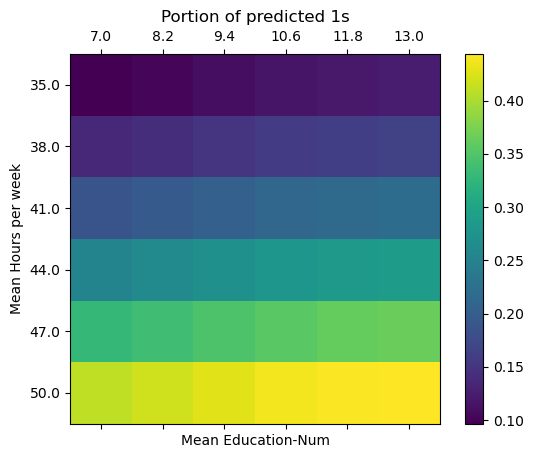

/Users/jm.loubes/Dropbox/Travail_2024/LEFKIT062024/LEFkit/robustness/GEMS3_classification_explainer.py:570: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtl)
/Users/jm.loubes/Dropbox/Travail_2024/LEFKIT062024/LEFkit/robustness/GEMS3_classification_explainer.py:571: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytl)


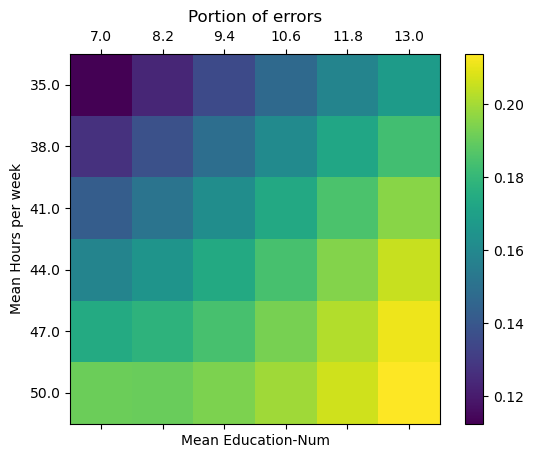

/Users/jm.loubes/Dropbox/Travail_2024/LEFKIT062024/LEFkit/robustness/GEMS3_classification_explainer.py:570: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtl)
/Users/jm.loubes/Dropbox/Travail_2024/LEFKIT062024/LEFkit/robustness/GEMS3_classification_explainer.py:571: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytl)


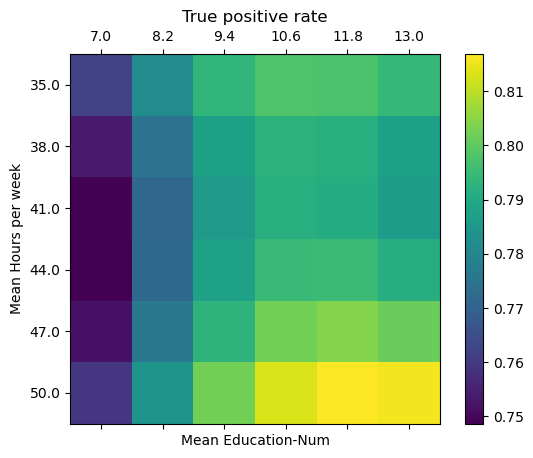

/Users/jm.loubes/Dropbox/Travail_2024/LEFKIT062024/LEFkit/robustness/GEMS3_classification_explainer.py:570: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtl)
/Users/jm.loubes/Dropbox/Travail_2024/LEFKIT062024/LEFkit/robustness/GEMS3_classification_explainer.py:571: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytl)


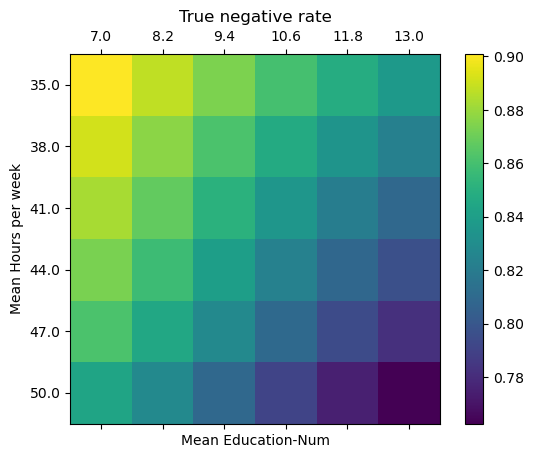

In [20]:
tce=table_classif_explainer(X, y_pred,y_true=y)

col_of_interest1=1  # -> Education-Num
col_of_interest2=6  # -> Hours per week
tce.plot_two_mean_influences_on_pred(col_of_interest1,col_of_interest2,X_column_name_1=X_col_names[col_of_interest1],X_column_name_2=X_col_names[col_of_interest2])
tce.plot_two_mean_influences_on_errors(col_of_interest1,col_of_interest2,X_column_name_1=X_col_names[col_of_interest1],X_column_name_2=X_col_names[col_of_interest2])


### 3.5  most influent variables

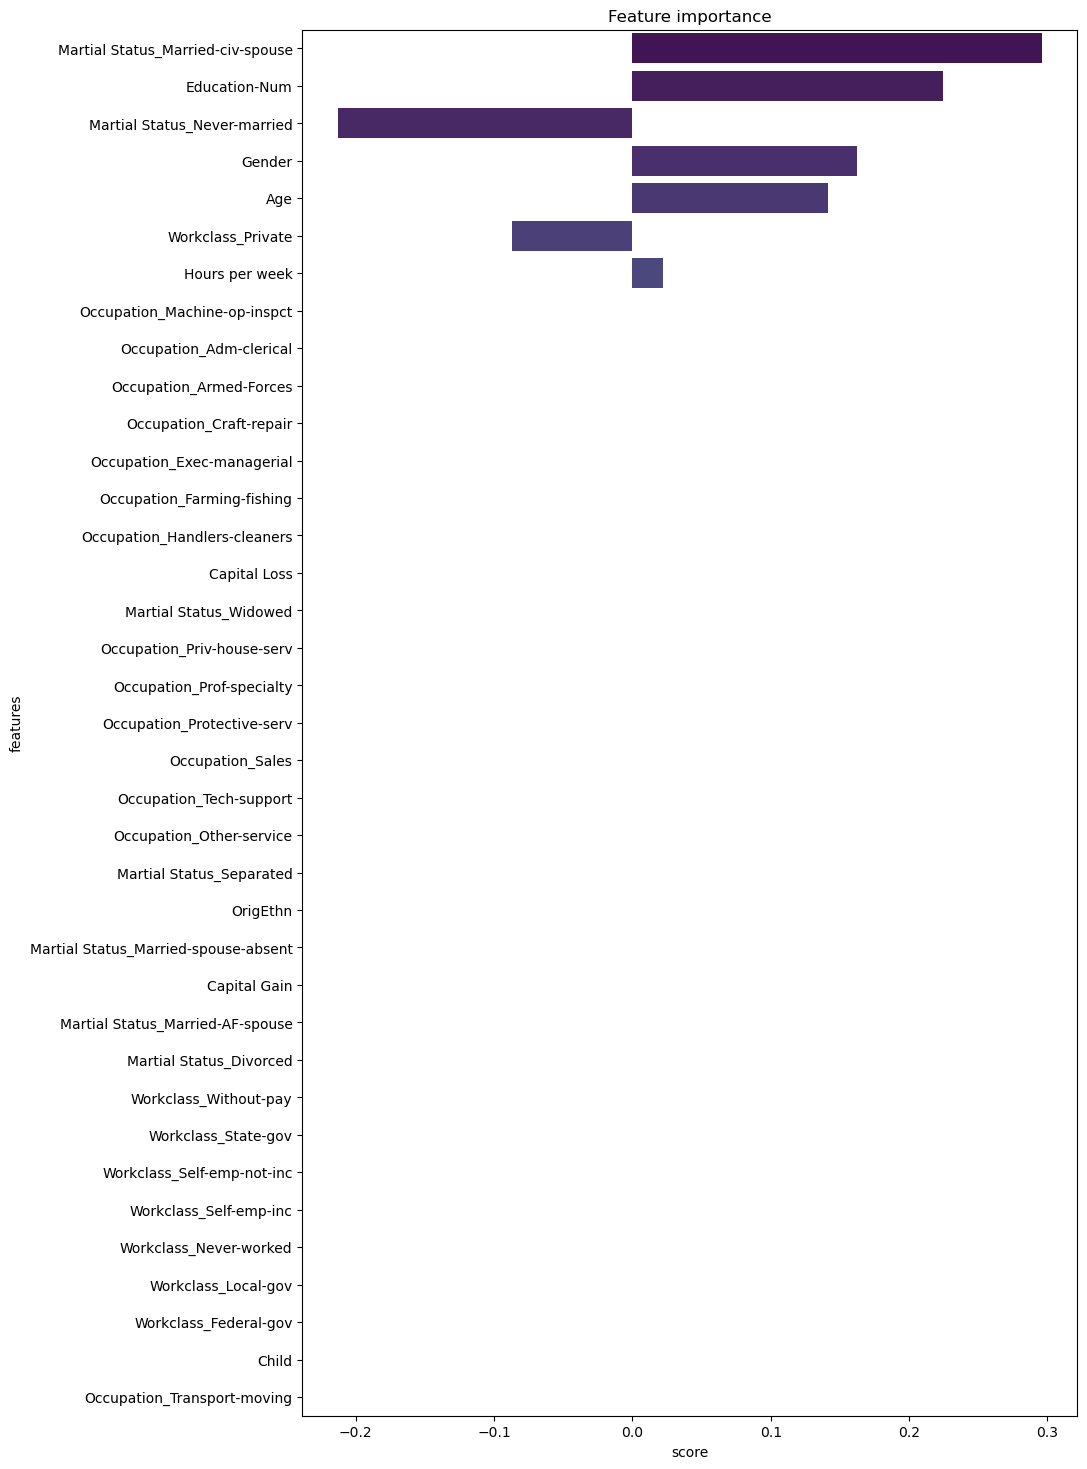

,score,signed_score,features
18,0.296104,0.296104,Martial Status_Married-civ-spouse
1,0.224158,0.224158,Education-Num
20,0.213093,-0.213093,Martial Status_Never-married
3,0.162279,0.162279,Gender
0,0.141140,0.141140,Age
11,0.086841,-0.086841,Workclass_Private
6,0.022011,0.022011,Hours per week
29,0.000000,0.000000,Occupation_Machine-op-inspct
23,0.000000,0.000000,Occupation_Adm-clerical
24,0.000000,0.000000,Occupation_Armed-Forces


In [21]:
tce=table_classif_explainer(X, y_pred,y_true=y)
tce.show_variables_influence_on_pred(List_X_column_names=X_col_names)
